<a href="https://colab.research.google.com/github/nhs-pycom/coding-club-IntroPython-6/blob/main/IntroPython_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The NHSX Analytics Unit: Aggregating NHS data using Pandas (Intro to Python 6)**

**Notebook by:** [Chris Todd](https://github.com/destructodd), [Mary Amanuel](https://github.com/maryamanuelnhsx)

The session will is going to focus on how we can reorganise data that we have, **using sorting, grouping, resampling and pivoting.**

**Dataset:** The following dataset examines combines data from [The English Indices of Deprivation 2019 ](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/833951/IoD2019_Technical_Report.pdf)and [Patient Online](https://https://digital.nhs.uk/data-and-information/data-collections-and-data-sets/data-collections/pomi) data to understand how the deprivation scores of GP practices and the rate at which patients use online services to book an appointment online and order a repeat prescriptions.


**Notes:**
- [Python Script for data](https://github.com/nhsx/online-services-demographic-modelling/blob/main/2019%20data%20-%20modelling%20deprivation%20only/patient-online-deprivation-score-model.ipynb)

- [Python for Data Analysis by Wes McKinney](https://www.oreilly.com/library/view/python-for-data/9781491957653/) was used as a key resource for this session. 

In [ ]:
#!pip install pandas

##**Pandas Fundamentals Recap** 



In [Intro to Python 5](https://github.com/nhs-pycom/coding-club-IntroPython-5/blob/main/IntroPython_5.ipynb) we looked at some basic Pandas functionality, covering the key data structures and some basic functionality including creating, importing, examining, appending, dropping and selecting. 

In [ ]:
## Importing pandas
import pandas as pd

## Create simple Dataframe (two-dimensional data structure with rows and columns i.e like a spreadsheet)
df = pd.DataFrame([['A',30,5],['B',40,6],['C',25,6]],columns=['name','age','height'])

## Or import a csv file as a dataframe
df_example = pd.read_csv("https://raw.githubusercontent.com/nhs-pycom/coding-club/main/introduction-to-python/data/time_series.csv")

## Examining dataframe
df.head() # see first 5 rows
df.describe() # see aggregate statistics for data

## Drop column
df.drop('height', axis=1)

## Selecting specific rows / columns
df['name'] # select column
df.iloc[1: 2] # iloc() function enables us to select a particular cell of the dataset
df[df['age'] >30] # Conditional selection - select rows with ages over 30

##**Sorting a Dataframe** 
The next piece of basic Pandas functionality we are going to look at is sorting. 

Sorting is one of the basic building blocks of data analysis, and is required in most projects. It allows us to understand the value of a datapoint relative to others, and speeds ups other tasks such as identifying duplicates and anlaysing the distribution. 

To begin, we are going to load a csv file hosted in this github report that Mary has put together, combining POMI data and deprivation indices. 

In [ ]:
import pandas as pd

In [ ]:
#We'll load the dataset using read_csv. The dataset already has an index column, so we will tell Pandas to use that rather than give it another one. 
gp_online_dep = pd.read_csv('https://raw.githubusercontent.com/nhs-pycom/coding-club/main/introduction-to-python/data/gp_patient_online_deprivation.csv')

gp_online_dep.set_index("Unnamed: 0", inplace = True)
gp_online_dep.index.name = "index"

In [ ]:
#Lets take a quick look at the dataset 
gp_online_dep.head()

In [ ]:
#Lets examine the number of rows and data types for each column
gp_online_dep.info()

In [ ]:
#There are lots of different ways we could sort this data, depending on what we're interested in. 
#We can sort by any of the columns, so initially lets try sorting by the Deprivation_Score_IMD_2019. We can use the sort_values method. 
#Its mandatory to pass the 'by' argument when using this method, to tell pandas which column to sort by. 
gp_online_dep.sort_values(by = 'Deprivation_Score_IMD_2019')

In [ ]:
#By default the method sorts ascending. If we want to sort it descending, we can add another argument.  
gp_online_dep.sort_values(by = 'Deprivation_Score_IMD_2019', ascending = False)

In [ ]:
#We can also sort by multiple criteria by passing a list of columns as the by argument. The rows will be sorted in the reverse of the order in the list. When we sort by a non-numeric column, it will be sorted alphabetically. 
gp_online_dep.sort_values(by = ['report_period_end', 'patient_list_size', 'Deprivation_Score_IMD_2019'], ascending = False)

In [ ]:
#These changes have not been applied to the original dataframe and are not saved. 
#If we wanted to  make the change 'permanent', we could either assign the result back to the original dataframe, or use the inplace argument. Both work, but the inplace argument is considered neater. 
gp_online_dep.sort_values(by = 'Deprivation_Score_IMD_2019', ascending = False, inplace = True)
gp_online_dep

In [ ]:
#It is also possible to sort by index. This doesn't come up as often, but can come in handy sometimes. For example, in this case  use it to return this dataframe back to its original order. The 'by' argument is not required here, as there is only one row index to choose from.  
gp_online_dep.sort_index()

In [ ]:
#You can also sort by the column index by specifycing axis=1. This reorders the columns by alphabetical order. Does anyone know of a situation where this would be useful?
gp_online_dep.sort_index(axis = 1)

In [ ]:
#Pandas also allows us to specify what sorting algorithm is employed, using the 'kind' argument. The options available are quicksort, mergesort and heapsort, defaulting to quicksort if none is specified. 
#This is a little out of scope of a pandas basics tutorial, but is worth investigating further if you are working with very large datasets or the speed of your code is important. A good overview can be found here https://realpython.com/sorting-algorithms-python.
gp_online_dep.sort_values(by = 'Deprivation_Score_IMD_2019', kind = 'heapsort')


**Exercise**



In [ ]:
# EX1) OrdSort the the rows by Pat_Appts_Use within region, from most patients to least. 


In [ ]:
# EX2) Use sort to find which GP practice has the highest prescriptions ordered by patients per capita?


##**Grouping a DataFrame**##

Sorting helps us understand things about individual datapoints, but what if we want to get information about groups of datapoints within the dataset? This is where groupby comes in.

In [ ]:
#Running the groupby method on a dataframe outputs a groupby object, wherein the dataframe has been split by the key specificed. In this case we have used decile. 
gp_online_dep_grouped = gp_online_dep.groupby('decile')

gp_online_dep_grouped.first()

In [ ]:
#No calcualtions have been made at this point, the groupby object has simply taken rows of the dataframe and assigned them to groups based on the decile field. 
#Now we can apply methods to the groupby object, which output a dataframe on which the aggregation calc has been applied. 

gp_online_dep_grouped.sum()

#This sums all the numeric columns for each group. Note that the non-numeric columns have been excluded from the output. 
#The key by which we grouped the data is used as the index of the dataframe by default. If we do not want this, we can add the 'as_index = False' argument to the groupby command.

In [ ]:
#If we add the sort_values method on to the end of that code, we then get a list of the deciles in order of deprivation. 
gp_online_dep_grouped.sum().sort_values(by = 'Deprivation_Score_IMD_2019', ascending = False)

In [ ]:
#You might have noticed that it doesn't make sense to sum any of the other columns, i.e. a sum of patient list size is useful, but sum of deprivation score doesn't mean anything, we really want to look at some measure of central tendecy for that. 
#Fortunately there are lots of other useful aggregation calculations can be applied to the groupby object besides sum, such as....  

gp_online_dep_grouped.mean()
gp_online_dep_grouped.max()
gp_online_dep_grouped.min()
gp_online_dep_grouped.std()
gp_online_dep_grouped.size()

In [ ]:
#size can be particularly useful when you want to know the number of records in each group wihtout having to use len. For example 
gp_online_dep_grouped.size()

In [ ]:
#You can apply these different aggregation calculations to each columns in a single command, using the .agg method and passing a dictionary describing what calc to use on what column. You can even use this to use a lambda as the aggregation function.

gp_online_dep_grouped.agg({'Pat_Presc_Use_per_1000':['mean', 'max'],
                           'patient_list_size': 'sum',
                         'Deprivation_Score_IMD_2019': lambda x: x.max() - x.min()})



Exercise


In [ ]:
#Ex1 - What is the mean and median appointments booked (hint: Pat_Appts_Use) in the 20% most deprived decile? 


##**Resampling**##

You may find that you want to aggregate (or deaggregate) data as in a groupby, but you have time series data. In this scenario, you should resample your data.

Resampling is the process of altering the frequency at which time series data is presented. Converting from daily to monthly data is an example of downsampling. Coverting from annual to weekly data is an example of upsampling.

Fortunately, Pandas has another built in function which will allow you to do this, know as resample.

In [ ]:
#we'll load some dummy time series data. The frequency of this data is daily from 1 Jan 2021 to 30 Jun 2021.
#The column contain the date value is just called 'Date'. We need to tell pandas to interpret that column as datetime object, and that all important "dayfirst=True" so it doesn't interpret that as US dates.
time_series_df = pd.read_csv("https://raw.githubusercontent.com/nhs-pycom/coding-club/main/introduction-to-python/data/time_series.csv", parse_dates=['Date'], dayfirst=True)

time_series_df.head()

In [ ]:
#We now apply the resample method to the dataframe, passing the column containing the dates in the 'on' argument (or we could set the date column as the index), and the frequency we want it to be resampled to, in this case M for monthly.
#Similarly to groupby, outputs a resample object, but we need to apply an aggregate function.
time_series_resampled_monthly = time_series_df.resample('M', on ='Date')

time_series_resampled_monthly

In [ ]:
#Sum is one of the more common aggregate functions, but several others are available such as mean, max, size, standard devation, just as with GroupBy 
time_series_resampled_monthly.sum()

Above we resampled to monthly, but there are a wide range of frequencies we can use, from yearly down to nanoseconds. Here is a list of all the different frequencies that can be sampled and the corresponding code. 

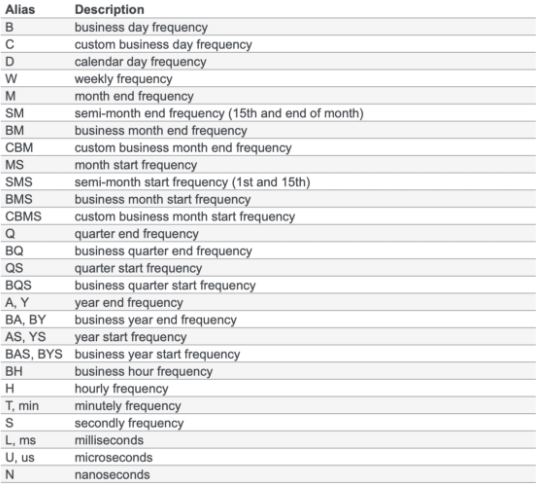

In [ ]:
#We can also modify these frequencies with a number. For example here we are resampling to a 2 weekly frequnecy. 
time_series_df.resample('2W', on ='Date').sum()

In [ ]:
#So downsampling is fairly straightforward, but what about upsampling? If we take our dataframe that we downsampled to monthly, and try upsampling it back to daily, what happens? 

time_series_upsampled = time_series_resampled_monthly.sum().resample('D')

#obviously data doesn't exist for all the days we have added in. We have a few options for how to fill those in, which replace the aggregate function we would apply to downsampled data. 

#just keep NAs where there is no data
time_series_upsampled.asfreq()

#forward fill or backfill - use the last or next know value
time_series_upsampled.ffill()
time_series_upsampled.bfill()

#Interpolate, where we interpolate the values between each data point. 
time_series_upsampled.interpolate(method='linear')

However, this is one of those moments where Python lets us down a little. All of these methods assume that we are using running totals. However, if we have a series of individual observations, there is no built in functionality to distribute them across a higher frequency.

For example, if we want to upsample from calendar months to weeks, there is no functionality to distribute the values proportionally across the weeks. 

There are some ways you can do this, but they are quite hacky and not very very satisfying. 


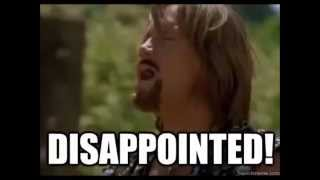

*Exercise*



In [ ]:
#Ex1- Can you think of use case were resampling would be useful for an NHS analyst?


In [ ]:
#Ex2- Resample our time series dataset to every second month end frequency and save it to use in the next question


In [ ]:
#Ex3 - Resample our dataset now at business quarter end frequency to daily, using forward fill to populate the blanks. 




##**PIVOT!**##

The final thing we are going to look at today are pivot tables, which are another way of re-grouping data. They are more commonly associated with Excel, but can be very useful in Python. I tend to think of them as a groupby with an extra step. 

In excel, they are referred to as having axes, values and series. Pandas uses the same concepts but refers to them as indices, values and columns. 

Lets return to our movies dataframe and try it out...

In [ ]:
#Pivot table is a pandas function rather than a method, so we call the function and pass the dataframe as an argument, rather than tag it to the end of the dataframe. Here we'll only specify the index, and the output we get is a multindex dataframe, just as we would get if we did a groupby on two keys. 
#It automatically applies the mean aggregation function to each category, rather than expecting us to explicitly apply it, but we can change that if we wish by passing "aggfunc = sum" as an argument.  

pd.pivot_table(gp_online_dep,index=["region_code", "decile"])

In [ ]:
#Next we can weed out some of the values we're not interested in, so lets add a values argument and specify deprivation scorem prescriptions per 1000  and patient size list. We'll also specify appropriate aggregation functions for each one. 

pd.pivot_table(gp_online_dep,index=["region_code", "decile",], values = ["Deprivation_Score_IMD_2019", "Pat_Presc_Use_per_1000", "patient_list_size"],aggfunc={'Deprivation_Score_IMD_2019': 'mean', 'Pat_Presc_Use_per_1000': 'mean', 'patient_list_size': 'sum'})

In [ ]:
#So far still nothing we couldn't do with a groupby. 
#Lets imagine that we have another table that has more information specific to each region that we want to join to our data. It would result in lots of duplication with out current data, as each region appears once for every deprivation group. 
#What if we could turn the deprivation rows into columns for each region? That is where the pivot table comes into its own. 
#If we change 'decile' from an index argument to a column argument, it splits out the decile as columns rather than rows, giving us a nice single row for each studio. I've also included fill_value = 0 to replace NAs where there is no value with a 0. 

pd.pivot_table(gp_online_dep,index=["region_code"], columns = "decile", values = "Pat_Appts_Use", fill_value = 0) 

In [ ]:
# Ex 1 - Can you think of another example where you would use a pivot table instead of groupby? (hypothetical or real)


In [ ]:
# Ex 3 - Correct this pivot table


pd.pivot_table(gp_online_deb.index=["Region_code"] 
               columns = 'decile", 
               values = ["Pat_Apppppts_Use","patient_list_size")
               fill-values = 0,
               margins=True
               dropna=True, 
               margins_name='All', 
               observed=False)

